In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_context("talk")
sns.set_style("white")

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


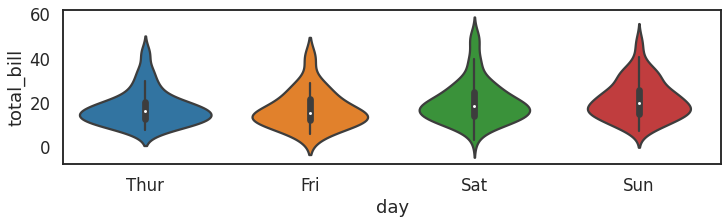

In [24]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax)
fig.savefig("violinplotedit02.png")

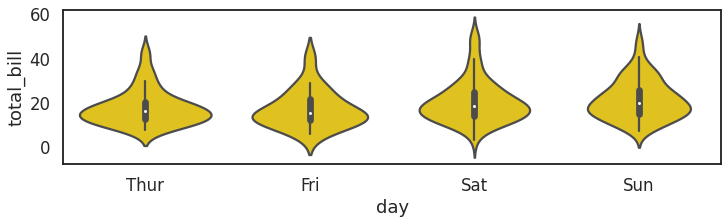

In [4]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", 
               color="gold", ax=ax)
fig.savefig("violinplotedit07.png")

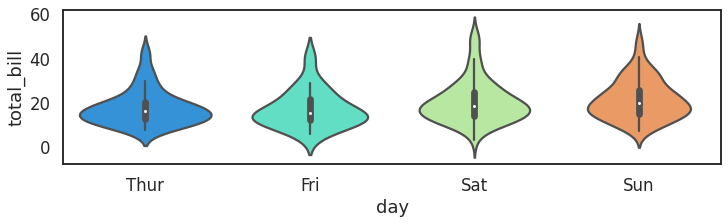

In [5]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", 
               palette="rainbow", ax=ax)
fig.savefig("violinplotedit08.png")

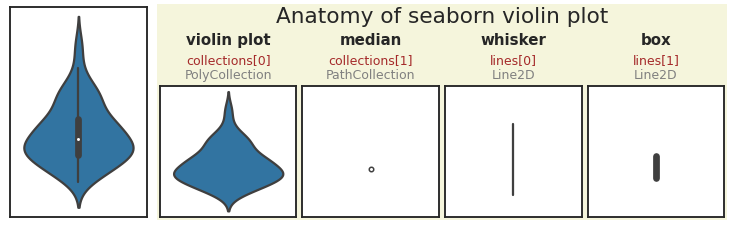

In [25]:
df_sample = df.query("day == 'Sun'")

fig = plt.figure(figsize=(10, 3), constrained_layout=True)
subfigs = fig.subfigures(1, 2, width_ratios=[1, 4])
axs_all = subfigs[0].subplots(1, 1)
sns.violinplot(data=df_sample, y="total_bill", ax=axs_all)
axs_all.set_yticks([])
axs_all.set_ylabel("")

subfigs[1].set_facecolor("beige")
axs_parts = subfigs[1].subplots(1, 4, sharey=True)
titles = ["violin plot\n\n", "median\n\n", "whisker\n\n", "box\n\n"]
artists = ["collections[0]\n", "collections[1]\n", "lines[0]\n", "lines[1]\n"]
objects = ["PolyCollection", "PathCollection", "Line2D", "Line2D"]
for i, (ax, title, artist, object) in enumerate(zip(axs_parts, titles, artists, objects)):
    sns.violinplot(data=df_sample, y="total_bill", ax=ax)
    parts = ax.collections + ax.lines
    [p.remove() for pi, p in enumerate(parts) if i != pi]
    ax.set_title(title, fontsize="small", fontweight="bold")
    ax.text(0.5, 1.05, artist, transform=ax.transAxes, ha="center", color="brown", fontsize="x-small")
    ax.text(0.5, 1.05, object, transform=ax.transAxes, ha="center", color="gray", fontsize="x-small")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel("")

subfigs[1].suptitle("Anatomy of seaborn violin plot")

fig.savefig("violinplotedit11.png")

8


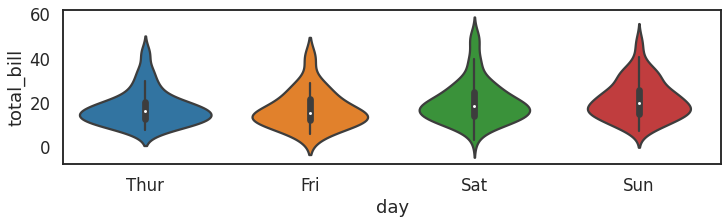

In [7]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax)

fig.savefig("violinplotedit03.png")

print(len(ax.collections))
ax.collections

In [8]:
print(len(ax.lines))
ax.lines

8


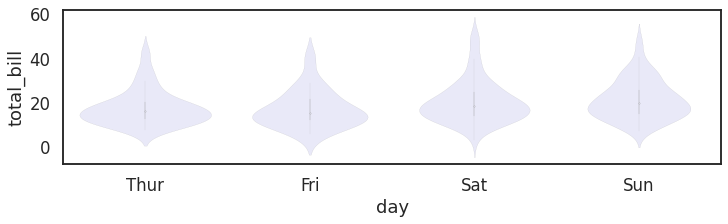

In [9]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax,
               color="lavender", linewidth=0.1)

fig.savefig("violinplotedit04.png")

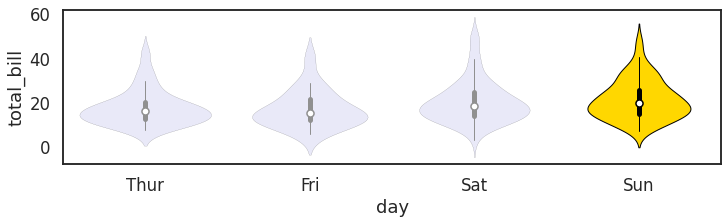

In [30]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax,
               color="lavender", linewidth=0.1)

# violin plot: PolyCollection
violins = [c for i, c in enumerate(ax.collections) if i%2 == 0]  
[v.set_edgecolor("k") for v in violins]  # 전체 violin edgecolor 변경
violins[3].set_facecolor("gold")     # Sunday violin facecolor 변경
violins[3].set_linewidth(1)          # Sunday violin linewidth 변경
violins[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# median marker: PathCollection
markers = [c for i, c in enumerate(ax.collections) if i%2 == 1]  
markers[3].set_facecolor("w")         # Sunday median facecolor 변경
markers[3].set_edgecolor("k")         # Sunday median edgecolor 변경
[m.set_sizes([50]) for m in markers]  # 전체 median size 변경

# box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[-2].set_color("k")                 # Sunday whisker 색상 변경
ls[-1].set_color("k")                 # Sunday box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

fig.savefig("violinplotedit05.png")

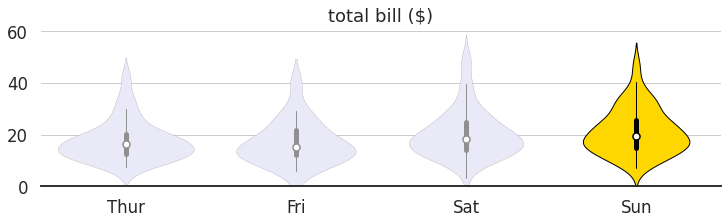

In [31]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax,
               color="lavender", linewidth=0.1)

# violin plot: PolyCollection
violins = [c for i, c in enumerate(ax.collections) if i%2 == 0]  
[v.set_edgecolor("k") for v in violins]  # 전체 violin edgecolor 변경
violins[3].set_facecolor("gold")  # Sunday violin facecolor 변경
violins[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# median marker: PathCollection
markers = [c for i, c in enumerate(ax.collections) if i%2 == 1]  
markers[3].set_facecolor("w")         # Sunday median facecolor 변경
markers[3].set_edgecolor("k")         # Sunday median edgecolor 변경
[m.set_sizes([50]) for m in markers]  # 전체 median size 변경

# box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[-2].set_color("k")                 # Sunday whisker 색상 변경
ls[-1].set_color("k")                 # Sunday box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

# spines 제거, grid 추가, xlabel 제거, ylabel 제거
ax.set_ylim(0, )
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("total bill ($)")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", lw=1)

fig.savefig("violinplotedit06.png")

In [13]:
violins

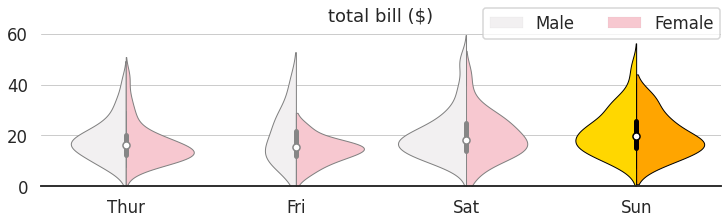

In [33]:
fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax,
               color="pink", hue="sex", split=True, linewidth=0.1)

### violin plot: PolyCollection

# Male
violins_M = [c for i, c in enumerate(ax.collections) if i%3 == 0]  
[v.set_edgecolor("gray") for v in violins_M]
[v.set_linewidth(1) for v in violins_M]
violins_M[3].set_facecolor("gold")  # Sunday violin facecolor 변경
violins_M[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins_M[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# Female
violins_F = [c for i, c in enumerate(ax.collections) if i%3 == 1]  
[v.set_edgecolor("gray") for v in violins_F]
[v.set_linewidth(1) for v in violins_F]
violins_F[3].set_facecolor("orange")  # Sunday violin facecolor 변경
violins_F[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins_F[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# median marker: PathCollection
markers = [c for i, c in enumerate(ax.collections) if i%3 == 2]  
markers[3].set_facecolor("w")         # Sunday median facecolor 변경
markers[3].set_edgecolor("k")         # Sunday median edgecolor 변경
[m.set_sizes([50]) for m in markers]  # 전체 median size 변경

# # box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[-2].set_color("k")                 # Sunday whisker 색상 변경
ls[-1].set_color("k")                 # Sunday box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

# # spines 제거, grid 추가, xlabel 제거, ylabel 제거
ax.set_ylim(0, )
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("total bill ($)")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", lw=1)
legend = ax.legend()
legend.remove()
fig.legend(loc="upper right", ncol=2)

fig.savefig("violinplotedit09.png")

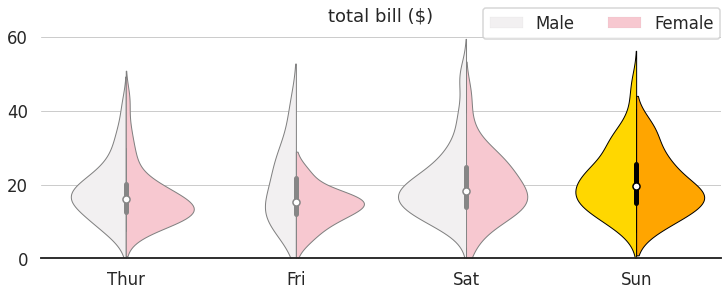

In [32]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax,
               color="pink", hue="sex", split=True, linewidth=0.1)

### violin plot: PolyCollection

# Male
violins_M = [c for i, c in enumerate(ax.collections) if i%3 == 0]  
[v.set_edgecolor("gray") for v in violins_M]
[v.set_linewidth(1) for v in violins_M]
violins_M[3].set_facecolor("gold")  # Sunday violin facecolor 변경
violins_M[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins_M[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# Female
violins_F = [c for i, c in enumerate(ax.collections) if i%3 == 1]  
[v.set_edgecolor("gray") for v in violins_F]
[v.set_linewidth(1) for v in violins_F]
violins_F[3].set_facecolor("orange")  # Sunday violin facecolor 변경
violins_F[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins_F[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# median marker: PathCollection
markers = [c for i, c in enumerate(ax.collections) if i%3 == 2]  
markers[3].set_facecolor("w")         # Sunday median facecolor 변경
markers[3].set_edgecolor("k")         # Sunday median edgecolor 변경
[m.set_sizes([50]) for m in markers]  # 전체 median size 변경

# # box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[-2].set_color("k")                 # Sunday whisker 색상 변경
ls[-1].set_color("k")                 # Sunday box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

# # spines 제거, grid 추가, xlabel 제거, ylabel 제거
ax.set_ylim(0, )
ax.set_yticks([0, 20, 40, 60])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("total bill ($)")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", lw=1)
legend = ax.legend()
legend.remove()
fig.legend(loc="upper right", ncol=2)

fig.savefig("violinplotedit00.png")